<a href="https://colab.research.google.com/github/hyeonsang010716/huggingface-study/blob/main/3_huggingface_LMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#환경 설정

In [1]:
!pip install torch==2.2.2+cu118
!pip install torchaudio==2.2.2+cu118
!pip install torchdata==0.7.1
!pip install torchtext==0.18.0
!pip install torchvision==0.17.2+cu118
!pip install huggingface_hub==0.23.4
!pip install transformers==4.41.2
!pip install datasets==2.20.0
!pip install evaluate==0.4.2
!pip install tokenizers==0.19.1
!pip install rouge_score==0.1.2
!pip install bitsandbytes==0.43.1
!pip install trl==0.9.4
!pip install peft==0.11.1
!pip install accelerate==0.32.1
!pip install pycocotools==2.0.8
!pip install pytesseract==0.3.10
!pip install diffusers==0.29.2
!pip install sentencepiece==0.2.0
!pip install faiss==1.7.4
!pip install ray==2.31.0
!pip install optuna==3.6.1
!pip install auto_gptq==0.7.1
!pip install optimum==1.20.0

ERROR: Could not find a version that satisfies the requirement torch==2.2.2+cu118 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1)
ERROR: No matching distribution found for torch==2.2.2+cu118
ERROR: Ignored the following yanked versions: 2.0.0
ERROR: Could not find a version that satisfies the requirement torchaudio==2.2.2+cu118 (from versions: 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 2.0.1, 2.0.2, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1)
ERROR: No matching distribution found for torchaudio==2.2.2+cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00
ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.17.2+cu118 (

# BLIP : 이미지와 텍스트 상호작용 모델(이미지 캡셔닝)

BLIP 하이퍼 파라미터 설정

In [ ]:
from transformers import Blip2Config

model_name = "Salesforce/blip2-opt-2.7b"
config = Blip2Config.from_pretrained(model_name)
print(config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

Blip2Config {
  "architectures": [
    "Blip2ForConditionalGeneration"
  ],
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "model_type": "blip-2",
  "num_query_tokens": 32,
  "qformer_config": {
    "classifier_dropout": null,
    "model_type": "blip_2_qformer"
  },
  "text_config": {
    "_name_or_path": "facebook/opt-2.7b",
    "activation_dropout": 0.0,
    "architectures": [
      "OPTForCausalLM"
    ],
    "eos_token_id": 50118,
    "ffn_dim": 10240,
    "hidden_size": 2560,
    "model_type": "opt",
    "num_attention_heads": 32,
    "num_hidden_layers": 32,
    "prefix": "</s>",
    "torch_dtype": "float16",
    "word_embed_proj_dim": 2560
  },
  "torch_dtype": "float32",
  "transformers_version": "4.41.2",
  "use_decoder_only_language_model": true,
  "vision_config": {
    "dropout": 0.0,
    "initializer_factor": 1.0,
    "model_type": "blip_2_vision_model",
    "num_channels": 3,
    "projection_dim": 512
  }
}



BLIP-2 모델 구조

In [ ]:
from transformers import Blip2ForConditionalGeneration

model = Blip2ForConditionalGeneration(config)

for main_name, main_module in model.named_children():
    print(main_name)
    for sub_name, sub_module in main_module.named_children():
        print("└", sub_name)
        for ssub_name, ssub_module in sub_module.named_children():
            print("│  └", ssub_name)
            for sssub_name, sssub_module in ssub_module.named_children():
                print("│    └", sssub_name)

vision_model
└ embeddings
│  └ patch_embedding
└ encoder
│  └ layers
│    └ 0
│    └ 1
│    └ 2
│    └ 3
│    └ 4
│    └ 5
│    └ 6
│    └ 7
│    └ 8
│    └ 9
│    └ 10
│    └ 11
│    └ 12
│    └ 13
│    └ 14
│    └ 15
│    └ 16
│    └ 17
│    └ 18
│    └ 19
│    └ 20
│    └ 21
│    └ 22
│    └ 23
│    └ 24
│    └ 25
│    └ 26
│    └ 27
│    └ 28
│    └ 29
│    └ 30
│    └ 31
│    └ 32
│    └ 33
│    └ 34
│    └ 35
│    └ 36
│    └ 37
│    └ 38
└ post_layernorm
qformer
└ layernorm
└ dropout
└ encoder
│  └ layer
│    └ 0
│    └ 1
│    └ 2
│    └ 3
│    └ 4
│    └ 5
│    └ 6
│    └ 7
│    └ 8
│    └ 9
│    └ 10
│    └ 11
language_projection
language_model
└ model
│  └ decoder
│    └ embed_tokens
│    └ embed_positions
│    └ final_layer_norm
│    └ layers
└ lm_head


**vision_model** : 임베딩 -> 정보 풍부화(이미지 핵심 특징 추출)

In [ ]:
import torch
from datasets import load_dataset
from transformers import Blip2Processor, Blip2ForConditionalGeneration

model_name = "Salesforce/blip2-opt-2.7b"
processor = Blip2Processor.from_pretrained(model_name)
model = Blip2ForConditionalGeneration.from_pretrained(
    model_name, torch_dtype=torch.float16, device_map="auto"
)

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

inputs = processor(images=image, return_tensors="pt").to(
    model.device, dtype=torch.float16
)
image_embeds = model.vision_model(
    inputs["pixel_values"], return_dict=True
).last_hidden_state

print(model.vision_model)
print(image_embeds)
print(image_embeds.shape)

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The repository for huggingface/cats-image contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/huggingface/cats-image.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] Y


Generating test split: 0 examples [00:00, ? examples/s]

Blip2VisionModel(
  (embeddings): Blip2VisionEmbeddings(
    (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
  )
  (encoder): Blip2Encoder(
    (layers): ModuleList(
      (0-38): 39 x Blip2EncoderLayer(
        (self_attn): Blip2Attention(
          (dropout): Dropout(p=0.0, inplace=False)
          (qkv): Linear(in_features=1408, out_features=4224, bias=True)
          (projection): Linear(in_features=1408, out_features=1408, bias=True)
        )
        (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        (mlp): Blip2MLP(
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1408, out_features=6144, bias=True)
          (fc2): Linear(in_features=6144, out_features=1408, bias=True)
        )
        (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
      )
    )
  )
  (post_layernorm): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
)
tensor([[[ 0.1365,  0.1932,  0.5527,  ..., -0.2

**qformer** : 학습 가능한 임베딩의 관계 표현

In [ ]:
image_attention_mask = torch.ones(
    image_embeds.size()[:-1], dtype=torch.long, device=model.device
)
query_tokens = model.query_tokens.expand(image_embeds.shape[0], -1, -1)

query_outputs = model.qformer(
    query_embeds=query_tokens,
    encoder_hidden_states=image_embeds,
    encoder_attention_mask=image_attention_mask,
    return_dict=True
)
query_output = query_outputs.last_hidden_state

print(image_attention_mask.shape)
print(query_tokens.shape)
print(query_output.shape)

torch.Size([1, 257])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])


**language_model** : 이미지 특징을 텍스트로 변환하는 역할

In [ ]:
language_model_inputs = model.language_projection(query_output)
language_attention_mask = torch.ones(
    language_model_inputs.size()[:-1],
    dtype=torch.long,
    device=model.device
)
input_ids = (
    torch.LongTensor([[model.config.text_config.bos_token_id]])
    .repeat(inputs["pixel_values"].shape[0], 1)
    .to(model.device)
)
attention_mask = torch.ones_like(input_ids)
attention_mask = torch.cat(
    [language_attention_mask, attention_mask.to(model.device)], dim=1
)

print(language_model_inputs.shape)
print(input_ids)

inputs_embeds = model.get_input_embeddings()(input_ids)
inputs_embeds = torch.cat(
    [language_model_inputs, inputs_embeds.to(model.device)], dim=1
)

outputs = model.language_model.generate(
    inputs_embeds=inputs_embeds, attention_mask=attention_mask, max_length=50
)
print(outputs)
print(outputs.shape)

torch.Size([1, 32, 2560])
tensor([[2]], device='cuda:0')
tensor([[ 7109, 10017, 11963,    15,    10, 16433, 50118]], device='cuda:0')
torch.Size([1, 7])


**이미지 캡셔닝 수행 예제**

In [ ]:
import torch
from datasets import load_dataset
from transformers import Blip2Processor, Blip2ForConditionalGeneration

model_name = "Salesforce/blip2-opt-2.7b"
processor = Blip2Processor.from_pretrained(model_name)
model = Blip2ForConditionalGeneration.from_pretrained(
    model_name, torch_dtype=torch.float16, device_map="auto"
)

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

inputs = processor(images=image, return_tensors="pt").to(model.device, torch.float16)
generated_ids = model.generate(**inputs, max_length=50)
print(generated_ids)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

tensor([[    2,  7109, 10017, 11963,    15,    10, 16433, 50118]],
       device='cuda:0')
two cats laying on a couch


캡셔닝 수행 후 상호작용 코드 예시

In [ ]:
prompt = "Question: Describe the location of the image. Answer:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(model.device, dtype=torch.float16)

generated_ids = model.generate(**inputs, max_length=50)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

A couch


# LayoutLM : 문서 질의 응답(DAQ : Document Question Answer)

LayoutLM 하이퍼파라미터 세팅

In [ ]:
from transformers import LayoutLMv3Config

model_name = "microsoft/layoutlmv3-base"
config = LayoutLMv3Config(model_name)
print(config)

LayoutLMv3Config {
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "coordinate_size": 128,
  "eos_token_id": 2,
  "has_relative_attention_bias": true,
  "has_spatial_attention_bias": true,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "input_size": 224,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_2d_position_embeddings": 1024,
  "max_position_embeddings": 512,
  "max_rel_2d_pos": 256,
  "max_rel_pos": 128,
  "model_type": "layoutlmv3",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "patch_size": 16,
  "rel_2d_pos_bins": 64,
  "rel_pos_bins": 32,
  "shape_size": 128,
  "text_embed": true,
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "visual_embed": true,
  "vocab_size": "microsoft/layoutlmv3-base"
}



LayoutLM 구조 시각화

In [ ]:
from transformers import LayoutLMv3Model

model = LayoutLMv3Model.from_pretrained(model_name)

for main_name, main_module in model.named_children():
    print(main_name)
    for sub_name, sub_module in main_module.named_children():
        print("└", sub_name)
        for ssub_name, ssub_module in sub_module.named_children():
            print("│  └", ssub_name)
            for sssub_name, sssub_module in ssub_module.named_children():
                print("│    └", sssub_name)

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

embeddings
└ word_embeddings
└ token_type_embeddings
└ LayerNorm
└ dropout
└ position_embeddings
└ x_position_embeddings
└ y_position_embeddings
└ h_position_embeddings
└ w_position_embeddings
patch_embed
└ proj
pos_drop
LayerNorm
dropout
norm
encoder
└ layer
│  └ 0
│    └ attention
│    └ intermediate
│    └ output
│  └ 1
│    └ attention
│    └ intermediate
│    └ output
│  └ 2
│    └ attention
│    └ intermediate
│    └ output
│  └ 3
│    └ attention
│    └ intermediate
│    └ output
│  └ 4
│    └ attention
│    └ intermediate
│    └ output
│  └ 5
│    └ attention
│    └ intermediate
│    └ output
│  └ 6
│    └ attention
│    └ intermediate
│    └ output
│  └ 7
│    └ attention
│    └ intermediate
│    └ output
│  └ 8
│    └ attention
│    └ intermediate
│    └ output
│  └ 9
│    └ attention
│    └ intermediate
│    └ output
│  └ 10
│    └ attention
│    └ intermediate
│    └ output
│  └ 11
│    └ attention
│    └ intermediate
│    └ output
└ rel_pos_bias
└ rel_pos_x_bias
└ rel_pos_

**pytesseract** : 구글 OCR 모듈

In [ ]:
!pip install pytesseract
!sudo apt-get update
!sudo apt-get install tesseract-ocr

DocVQA 데이터 셋 전처리

/usr/local/lib/python3.10/dist-packages/transformers/models/layoutlmv3/feature_extraction_layoutlmv3.py:30: FutureWarning: The class LayoutLMv3FeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use LayoutLMv3ImageProcessor instead.
  warnings.warn(


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

dict_keys(['questionId', 'question', 'question_types', 'image', 'docId', 'ucsf_document_id', 'ucsf_document_page_no', 'answers', 'data_split', 'words', 'boxes', 'pixel_values'])
question : What is name of university?
answers : ['university of california', 'University of California', 'university of california, san diego']
words : ['UNIVERSITY', 'OP', 'CALIBORNIA,', 'SAN', 'DIEGO']
boxes : [[47, 63, 280, 86], [300, 56, 308, 69], [347, 51, 511, 90], [523, 64, 595, 90], [603, 64, 706, 83]]


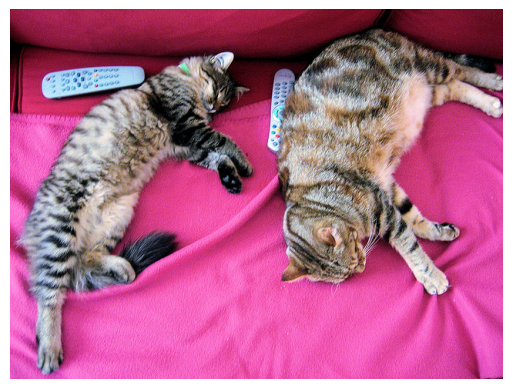

In [ ]:
import io
from PIL import Image
from datasets import load_dataset
from transformers import LayoutLMv3FeatureExtractor
import pytesseract
import matplotlib.pyplot as plt

def get_ocr_words_and_boxes(sample):
    image_bytes = io.BytesIO(sample["image"])
    image = Image.open(image_bytes)
    encoded_inputs = feature_extractor(image)
    sample["words"] = encoded_inputs.words[0]
    sample["boxes"] = encoded_inputs.boxes[0]
    sample["pixel_values"] = encoded_inputs.pixel_values[0]
    return sample

dataset = load_dataset("s076923/docvqa-train")
model_name = "microsoft/layoutlmv3-base"
feature_extractor = LayoutLMv3FeatureExtractor(model_name)
dataset_with_ocr = dataset["train"].map(get_ocr_words_and_boxes)

print(dataset_with_ocr[1].keys())
print("question :", dataset_with_ocr[1]["question"])
print("answers :", dataset_with_ocr[1]["answers"])
print("words :", dataset_with_ocr[1]["words"])
print("boxes :", dataset_with_ocr[1]["boxes"])

# 마지막 샘플 이미지 1개만 출력
plt.imshow(image)
plt.axis('off')  # 축 제거
plt.show()

데이터 답변 위치 추출

In [ ]:
def find_sublist(word_list, target_list):
    word_list = [word.lower() for word in word_list]
    target_list = target_list.lower().split()

    for i in range(len(word_list) - len(target_list) + 1):
        if word_list[i : i + len(target_list)] == target_list:
            return target_list, i, i + len(target_list) - 1
    return None, 0, 0

question = dataset_with_ocr[-1]["question"]
words = dataset_with_ocr[-1]["words"]
answers = dataset_with_ocr[-1]["answers"]
print(question)
print(words)
print(answers)
print()

for answer in answers:
    match, word_idx_start, word_idx_end = find_sublist(words, answer)
    print("Match :", match)
    print("Word idx start :", word_idx_start)
    print("Word idx end :", word_idx_end)
    print()

How many sustainability committee meetings has Y. C. Deveshwar attended?
['MENA', 'Enduring', 'Value', 'Report', 'on', 'Corporate', 'Governance', 'Attendance', 'at', 'Nominations', 'Committee', 'Meetings', 'during', 'the', 'financial', 'year', 'Ce', 'AUT', 'UTIL', 'Y.C.', 'Deveshwar', '2', 'A.', 'Baijal', '2', 'S.', 'Banerjee', '2', 'A.V.', 'Girija', 'Kumar', '2', 'S.H.', 'Khan', '2', '5.', 'B.', 'Mathur', '1', 'D.', 'K.', 'Mehrotra', 'Nil', 'P.', 'B.', 'Ramanujam', '2', 'S.S.H.', 'Rehman', '@', 'NA', 'M.', 'Shankar', '®', 'NA', 'K.', 'Vaidyanath', '2', '@', 'Appointed', 'Member', 'w.e.f.', '18th', 'January,', '2013.', 'V.', 'SUSTAINABILITY', 'COMMITTEE', 'The', 'role', 'of', 'the', 'Sustainability', 'Committee', 'is', 'to', 'review,', 'monitor', 'and', 'provide', 'strategic', 'direction', 'to', 'the', 'Company’s', 'sustainability', 'practices', 'towards', 'fulfilling', 'its', 'triple', 'bottom', 'line', 'objectives.', 'The', 'Committee', 'seeks', 'to', 'guide', 'the', 'Company', 'in',

모델 학습을 하기 전 LayoutLMv3 데이터 셋 전처리

In [ ]:
from transformers import LayoutLMv3TokenizerFast
from datasets import Features, Sequence, Value, Array2D, Array3D

def find_answer_match(words, answers):
    for answer in answers:
        match, word_idx_start, word_idx_end = find_sublist(words, answer)
        if match:
            return match, word_idx_start, word_idx_end

    for answer in answers:
        for i in range(len(answer)):
            answer_modified = answer[:i] + answer[i + 1 :]
            match, word_idx_start, word_idx_end = find_sublist(words, answer_modified)
            if match:
                return match, word_idx_start, word_idx_end

    return False, None, None

def encode_dataset(examples, processor, max_length=512):
    encoding = processor(
        examples["question"],
        examples["words"],
        examples["boxes"],
        max_length=max_length,
        padding="max_length",
        truncation=True
    )

    cls_index = encoding.input_ids.index(processor.cls_token_id)
    start_position = end_position = cls_index

    match, word_idx_start, word_idx_end = find_answer_match(
        examples["words"], examples["answers"]
    )

    if match:
        sequence_ids = encoding.sequence_ids(0)
        token_start_index = next(i for i, seq_id in enumerate(sequence_ids) if seq_id == 1)

        token_end_index = len(encoding.input_ids) - 1 - sequence_ids[::-1].index(1)
        word_ids = encoding.word_ids()[token_start_index : token_end_index + 1]

        start_position = token_start_index + word_ids.index(word_idx_start)
        end_position = token_end_index - word_ids[::-1].index(word_idx_end)

    encoding["image"] = examples["pixel_values"]
    encoding["start_positions"] = start_position
    encoding["end_positions"] = end_position
    return encoding

processor = LayoutLMv3TokenizerFast.from_pretrained(model_name)
encoded_dataset = dataset_with_ocr.map(
    lambda x: encode_dataset(x, processor),
    remove_columns=dataset_with_ocr.column_names,
    features=Features(
        {
            "input_ids": Sequence(feature=Value(dtype="int64")),
            "bbox": Array2D(dtype="int64", shape=(512, 4)),
            "attention_mask": Sequence(Value(dtype="int64")),
            "image": Array3D(dtype="float32", shape=(3, 224, 224)),
            "start_positions": Value(dtype="int64"),
            "end_positions": Value(dtype="int64")
        }
    )
)
print(encoded_dataset)

tokenizer_config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'bbox', 'attention_mask', 'image', 'start_positions', 'end_positions'],
    num_rows: 20
})


LayoutLMv3 모델 학습

In [ ]:
from transformers import TrainingArguments, Trainer
from transformers import LayoutLMv3ForQuestionAnswering

model = LayoutLMv3ForQuestionAnswering.from_pretrained(model_name)

training_args = TrainingArguments(
    output_dir="DocVQA",
    num_train_epochs=20,
    per_device_train_batch_size=4,
    learning_rate=5e-5,
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy="steps",
    logging_steps=20,
    seed=42
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset
)

trainer.train()

Some weights of LayoutLMv3ForQuestionAnswering were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['qa_outputs.dense.bias', 'qa_outputs.dense.weight', 'qa_outputs.out_proj.bias', 'qa_outputs.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1052: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Step,Training Loss
20,6.099600
40,5.091300
60,3.358500
80,2.451800
100,2.125800


TrainOutput(global_step=100, training_loss=3.825390434265137, metrics={'train_runtime': 59.194, 'train_samples_per_second': 6.757, 'train_steps_per_second': 1.689, 'total_flos': 106163132006400.0, 'train_loss': 3.825390434265137, 'epoch': 20.0})

추론 데이터 전처리

In [ ]:
import torch
from transformers import LayoutLMv3Processor

index = 5
processor = LayoutLMv3Processor.from_pretrained(model_name)

image_bytes = io.BytesIO(dataset_with_ocr[index]["image"])
image = Image.open(image_bytes)

full_text = processor.decode(encoded_dataset["input_ids"][index])
print("Full text:", full_text)

question = dataset_with_ocr[index]["question"]
print("Question:", question)

start_position = encoded_dataset["start_positions"][index]
end_position = encoded_dataset["end_positions"][index]
answer = processor.decode(
    encoded_dataset["input_ids"][index][start_position : end_position + 1]
)
print("Answer:", answer)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoded_inputs = processor(image, question, return_tensors="pt")
encoded_inputs = {k: v.to(device) for k, v in encoded_inputs.items()}
print("Encoded input keys:", encoded_inputs.keys())

preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

Full text: <s> What the location address of NSDA?</s></s> The best thing between two sandwiches. Soft drinks go with all kinds of sandwiches. Round ones, square ones, fat ones and lean ones. Not only do they quench large thirsts in a fun way; they also help bal- ance the diet. After all, healthy bodies need 5 to 6 glasses of water a day. Soft drinks contain the purest, filtered water. So sandwich soft drinks among your sandwiches. And celebrate Na- tional Sandwich Month every month in the year. For information on soft drinks and the balanced diet, write: NATIONAL SOFT DRINK ASSOCIATION 1128 SIXTEENTH ST., N. W., WASHINGTON, D.C. 20036</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad

추론!!

In [ ]:
model.to(device)
model.eval()

with torch.no_grad():
    outputs = model(**encoded_inputs)

start_logits, end_logits = outputs.start_logits, outputs.end_logits
start_index = start_logits.argmax(-1).item()
end_index = end_logits.argmax(-1).item()
predicted_answer = processor.decode(
    encoded_inputs["input_ids"].squeeze()[start_index : end_index + 1]
)

print("Predicted start_index:", start_index)
print("Predicted end_index:", end_index)
print("predicted_answer:", predicted_answer)

Predicted start_index: 132
Predicted end_index: 153
predicted_answer:  1128 SIXTEENTH ST., N. W., WASHINGTON, D.C. 20036


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1052: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


# 시각적 질의 응답(VQA : Visual Question Answering)

## 모델 - ViLT

ViLT 하이퍼파라미터 세팅

In [ ]:
from transformers import ViltConfig

model_name = "dandelin/vilt-b32-mlm"
config = ViltConfig.from_pretrained(model_name)
print(config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

ViltConfig {
  "architectures": [
    "ViltForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.0,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_image_length": -1,
  "max_position_embeddings": 40,
  "modality_type_vocab_size": 2,
  "model_type": "vilt",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "num_images": -1,
  "patch_size": 32,
  "qkv_bias": true,
  "tie_word_embeddings": false,
  "torch_dtype": "float32",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "vocab_size": 30522
}



ViLT 모델 구조

In [ ]:
from transformers import ViltModel

model = ViltModel.from_pretrained(model_name)

for main_name, main_module in model.named_children():
    print(main_name)
    for sub_name, sub_module in main_module.named_children():
        print("└", sub_name)
        for ssub_name, ssub_module in sub_module.named_children():
            print("│  └", ssub_name)
            for sssub_name, sssub_module in ssub_module.named_children():
                print("│    └", sssub_name)

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

embeddings
└ text_embeddings
│  └ word_embeddings
│  └ position_embeddings
│  └ token_type_embeddings
│  └ LayerNorm
│  └ dropout
└ patch_embeddings
│  └ projection
└ token_type_embeddings
└ dropout
encoder
└ layer
│  └ 0
│    └ attention
│    └ intermediate
│    └ output
│    └ layernorm_before
│    └ layernorm_after
│  └ 1
│    └ attention
│    └ intermediate
│    └ output
│    └ layernorm_before
│    └ layernorm_after
│  └ 2
│    └ attention
│    └ intermediate
│    └ output
│    └ layernorm_before
│    └ layernorm_after
│  └ 3
│    └ attention
│    └ intermediate
│    └ output
│    └ layernorm_before
│    └ layernorm_after
│  └ 4
│    └ attention
│    └ intermediate
│    └ output
│    └ layernorm_before
│    └ layernorm_after
│  └ 5
│    └ attention
│    └ intermediate
│    └ output
│    └ layernorm_before
│    └ layernorm_after
│  └ 6
│    └ attention
│    └ intermediate
│    └ output
│    └ layernorm_before
│    └ layernorm_after
│  └ 7
│    └ attention
│    └ intermediate
│    └

VQAv2 학습 데이터 셋 전처리

In [ ]:
from datasets import load_dataset
from transformers import ViltConfig

def preprocess_data(example, config):
    answers = example["answers"]
    answer_counts = {}
    for answer_dict in answers:
        answer_text = answer_dict["answer"]
        answer_counts[answer_text] = answer_counts.get(answer_text, 0) + 1

    labels = []
    scores = []
    for answer_text, count in answer_counts.items():
        if answer_text not in config.label2id:
            continue
        labels.append(config.label2id[answer_text])
        score = min(1.0, count / 3)
        scores.append(score)

    example["labels"] = labels
    example["scores"] = scores
    return example

config_name = "dandelin/vilt-b32-finetuned-vqa"
config = ViltConfig.from_pretrained(config_name)

dataset = load_dataset("s076923/vqa-v2-test")
processed_dataset = dataset["test"].map(
    lambda example: preprocess_data(example, config),
    batched=False
)
print(processed_dataset[0])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

{'image_id': 262148, 'question': 'Where is he looking?', 'question_id': 262148000, 'question_type': 'none of the above', 'multiple_choice_answer': 'down', 'answers': [{'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 1}, {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 2}, {'answer': 'at table', 'answer_confidence': 'yes', 'answer_id': 3}, {'answer': 'skateboard', 'answer_confidence': 'yes', 'answer_id': 4}, {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 5}, {'answer': 'table', 'answer_confidence': 'yes', 'answer_id': 6}, {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 7}, {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 8}, {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 9}, {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 10}], 'answer_type': 'other', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x512 at 0x7920A2435420>, 'labels': [267, 2063, 11, 81], 'scores': [1.0, 0.333333333333333

VQAv2 데이터셋 변환

In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import ViltProcessor

class VQADataset(Dataset):
    def __init__(self, dataset, config, processor):
        self.dataset = dataset
        self.config = config
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        data = self.dataset[idx]

        encoding = self.processor(
            images=data["image"],
            text=data["question"],
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        encoding = {k: v[0] for k, v in encoding.items()}

        targets = torch.zeros(len(self.config.id2label))
        targets[data["labels"]] = torch.tensor(data["scores"])
        encoding["labels"] = targets

        return encoding

model_name = "dandelin/vilt-b32-mlm"
processor = ViltProcessor.from_pretrained(model_name)
vqa_dataset = VQADataset(dataset=processed_dataset, config=config, processor=processor)

print(vqa_dataset[0].keys())
print(processor.decode(vqa_dataset[0]["input_ids"]))
labels = torch.nonzero(vqa_dataset[0]["labels"]).squeeze().tolist()
print([config.id2label[label] for label in labels])

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'pixel_values', 'pixel_mask', 'labels'])
[CLS] where is he looking? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
['skateboard', 'table', 'down', 'at table']


ViLT 모델 셋업

In [ ]:
from transformers import ViltForQuestionAnswering

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViltForQuestionAnswering.from_pretrained(
    model_name, id2label=config.id2label, label2id=config.label2id
).to(device)
print(model.classifier)

Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.1.bias', 'classifier.1.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sequential(
  (0): Linear(in_features=768, out_features=1536, bias=True)
  (1): LayerNorm((1536,), eps=1e-05, elementwise_affine=True)
  (2): GELU(approximate='none')
  (3): Linear(in_features=1536, out_features=3129, bias=True)
)


collate_fn 데이터 로더 전처리

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    input_ids = [item["input_ids"] for item in batch]
    pixel_values = [item["pixel_values"] for item in batch]
    attention_mask = [item["attention_mask"] for item in batch]
    token_type_ids = [item["token_type_ids"] for item in batch]
    labels = [item["labels"] for item in batch]

    encoding = processor.image_processor.pad(pixel_values, return_tensors="pt")

    batch = {
        "input_ids": torch.stack(input_ids),
        "attention_mask": torch.stack(attention_mask),
        "token_type_ids": torch.stack(token_type_ids),
        "pixel_values": encoding["pixel_values"],
        "pixel_mask": encoding["pixel_mask"],
        "labels": torch.stack(labels)
    }
    return batch

dataloader = DataLoader(
    vqa_dataset,
    collate_fn=collate_fn,
    batch_size=4,
    shuffle=False
)

batch = next(iter(dataloader))
for key, value in batch.items():
    print(f"{key}: {value.shape}")

input_ids: torch.Size([4, 40])
attention_mask: torch.Size([4, 40])
token_type_ids: torch.Size([4, 40])
pixel_values: torch.Size([4, 3, 384, 544])
pixel_mask: torch.Size([4, 384, 544])
labels: torch.Size([4, 3129])


사용된 데이터 복원

Question: [CLS] what are the people in the background doing? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Possible answers: ['watching']


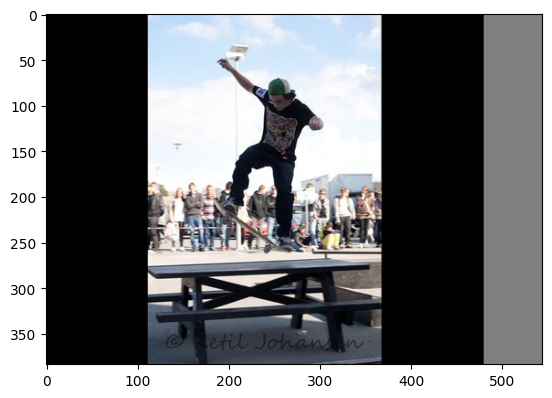

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def unnormalize_image(pixel_values, image_mean, image_std):
    scaled = pixel_values * np.array(image_std)[:, None, None]
    shifted = scaled + np.array(image_mean)[:, None, None]
    uint8_image = (shifted * 255).astype(np.uint8)
    return uint8_image.transpose(1, 2, 0)

batch_idx = 1

image = unnormalize_image(
    pixel_values=batch["pixel_values"][batch_idx].numpy(),
    image_mean=processor.image_processor.image_mean,
    image_std=processor.image_processor.image_std
)
print("Question:", processor.decode(batch["input_ids"][batch_idx]))

labels = torch.nonzero(batch["labels"][batch_idx]).flatten().tolist()
label_names = [config.id2label[label] for label in labels]
print("Possible answers:", label_names)

plt.imshow(Image.fromarray(image))
plt.show()

VQA 모델 학습

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="VQA",
    num_train_epochs=20,
    per_device_train_batch_size=8,
    learning_rate=1e-4,
    weight_decay=0.01,
    logging_strategy="steps",
    logging_steps=20,
    seed=42
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=vqa_dataset,
    data_collator=collate_fn
)

trainer.train()

Step,Training Loss
20,1378.582600
40,349.534700
60,81.501300
80,25.276200
100,13.366300
120,10.340800
140,8.780200
160,8.310400
180,7.333900
200,6.818000


TrainOutput(global_step=260, training_loss=146.86864445026103, metrics={'train_runtime': 67.8446, 'train_samples_per_second': 29.479, 'train_steps_per_second': 3.832, 'total_flos': 45174647520000.0, 'train_loss': 146.86864445026103, 'epoch': 20.0})

추론 예제

Sample keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'pixel_values', 'pixel_mask', 'labels'])
Question: [CLS] is this a creamy soup? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Answer: no      Probability: 0.5847
Answer: yes     Probability: 0.4415
Answer: 1       Probability: 0.0351
Answer: white   Probability: 0.0260
Answer: 7       Probability: 0.0220


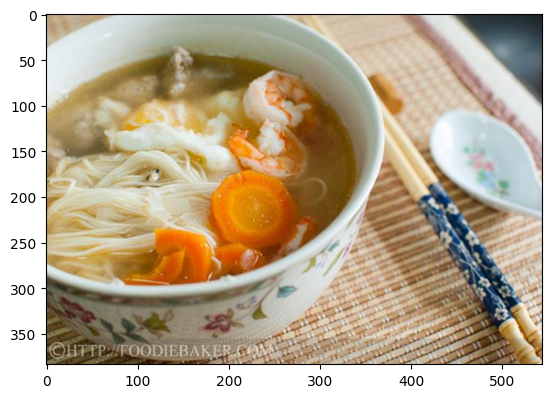

In [ ]:
sample_index = 4
sample = vqa_dataset[sample_index]

print("Sample keys:", sample.keys())
print("Question:", processor.decode(sample["input_ids"]))

sample = {k: v.unsqueeze(0).to(device) for k, v in sample.items()}

model.eval()
with torch.no_grad():
    outputs = model(**sample)

logits = outputs.logits
predicted_probs = torch.sigmoid(logits)
top_probs, top_classes = torch.topk(predicted_probs, 5)

top_probs = top_probs.squeeze().tolist()
top_classes = top_classes.squeeze().tolist()
for prob, class_idx in zip(top_probs, top_classes):
    answer = model.config.id2label[class_idx]
    print(f"Answer: {answer:<7} Probability: {prob:.4f}")

unnormalized_image = unnormalize_image(
    pixel_values=vqa_dataset[sample_index]["pixel_values"].numpy(),
    image_mean=processor.image_processor.image_mean,
    image_std=processor.image_processor.image_std,
)

plt.imshow(Image.fromarray(unnormalized_image))
plt.show()

# 이미지 생성 : Stable-Diffusion

In [ ]:
!pip install diffusers sentencepiece

StableDiffusion3Pipeline 모델 설정

In [ ]:
import torch
from diffusers import StableDiffusion3Pipeline

token = ""  # 토큰 입력
model_name = "stabilityai/stable-diffusion-3-medium-diffusers"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe = StableDiffusion3Pipeline.from_pretrained(
    model_name, token=token, torch_dtype=torch.float16
).to(device)
print(pipe.config)

프롬프트 임베딩

In [5]:
prompt = ["gray cat holding a yellow ball"]
prompt_2 = prompt
prompt_3 = prompt
num_images_per_prompt = 1
clip_skip = None
max_sequence_length = 256

prompt_embed, pooled_prompt_embed = pipe._get_clip_prompt_embeds(
    prompt=prompt,
    device="cuda",
    num_images_per_prompt=num_images_per_prompt,
    clip_skip=clip_skip,
    clip_model_index=0
)
prompt_2_embed, pooled_prompt_2_embed = pipe._get_clip_prompt_embeds(
    prompt=prompt_2,
    device="cuda",
    num_images_per_prompt=num_images_per_prompt,
    clip_skip=clip_skip,
    clip_model_index=1
)
clip_prompt_embeds = torch.cat([prompt_embed, prompt_2_embed], dim=-1)

t5_prompt_embed = pipe._get_t5_prompt_embeds(
    prompt=prompt_3,
    num_images_per_prompt=num_images_per_prompt,
    max_sequence_length=max_sequence_length,
    device="cuda"
)

clip_prompt_embeds = torch.nn.functional.pad(
    clip_prompt_embeds, (0, t5_prompt_embed.shape[-1] - clip_prompt_embeds.shape[-1])
)

prompt_embeds = torch.cat([clip_prompt_embeds, t5_prompt_embed], dim=-2)
pooled_prompt_embeds = torch.cat([pooled_prompt_embed, pooled_prompt_2_embed], dim=-1)

print("prompt_embed.shape:", prompt_embed.shape)
print("prompt2_embed.shape:", prompt_2_embed.shape)
print("t5_prompt_embed.shape:", t5_prompt_embed.shape)
print("prompt_embeds.shape:", prompt_embeds.shape)
print("pooled_prompt_embeds.shape:", pooled_prompt_embeds.shape)

prompt_embed.shape: torch.Size([1, 77, 768])
prompt2_embed.shape: torch.Size([1, 77, 1280])
t5_prompt_embed.shape: torch.Size([1, 256, 4096])
prompt_embeds.shape: torch.Size([1, 333, 4096])
pooled_prompt_embeds.shape: torch.Size([1, 2048])


이미지 생성 예제1

In [ ]:
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusion3Pipeline

token = "hf_###..."  # 토큰 입력
model_name = "stabilityai/stable-diffusion-3-medium-diffusers"

gpu_total_memory_gb = torch.cuda.get_device_properties("cuda").total_memory / 1024**3
torch_dtype = torch.float16 if gpu_total_memory_gb < 24 else torch.float32
pipe = StableDiffusion3Pipeline.from_pretrained(
    model_name, token=token, torch_dtype=torch_dtype
)
pipe.to("cuda")

generator = torch.Generator(device="cuda").manual_seed(3)
image = pipe(
    prompt="gray cat holding a yellow ball",
    negative_prompt="",
    num_inference_steps=28,
    guidance_scale=7.0,
    generator=generator
).images[0]
plt.imshow(image)
plt.show()


이미지 생성 예제 2

In [ ]:
prompt = "There is a sleek gray cat with gleaming silver fur and vibrant emerald eyes. This cat's most treasured possession is a bright yellow ball that it carries everywhere. One can imagine the cat happily batting the ball around the garden."
image = pipe(
    prompt=prompt,
    negative_prompt="",
    num_inference_steps=28,
    guidance_scale=7.0,
    max_sequence_length=512,
    generator=generator
).images[0]
plt.imshow(image)
plt.show()

이미지 생성 예제 3

In [ ]:
prompt = "There is a sleek gray cat with gleaming silver fur and vibrant emerald eyes. This cat's most treasured possession is a bright yellow ball that it carries everywhere. One can imagine the cat happily batting the ball around the garden."
negative_prompt = "Blurry, low quality, distorted features, multiple cats, dogs, humans, cartoon style, anime, sketchy, black and white, indoor setting, rainy weather, dark or gloomy atmosphere."
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=28,
    guidance_scale=7.0,
    max_sequence_length=512,
    generator=generator
).images[0]
plt.imshow(image)
plt.show()